In [144]:
import numpy as np
signal = np.loadtxt('signal.txt', dtype = np.complex128)
result = np.loadtxt('result.txt', dtype = np.complex128)
result[1:] = result[range(result.shape[0] - 1, 0, -1)]
print(np.allclose(np.fft.fft(signal),result))

True


In [28]:

#!/usr/bin/python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16,9))

df = pd.read_table("data.txt", sep='\t',index_col = None, names = ['N', 'p', 'time'])
df = df.groupby(['N', 'p']).mean().reset_index()
df

,N,p,time
0,1024,1,0.000143
1,1024,2,0.003261
2,1024,3,0.002929
3,1024,4,0.003278
4,1024,5,0.003533
...,...,...,...
70,4194304,7,1.054536
71,4194304,8,1.092801
72,8388608,1,4.836524
73,16777216,1,10.491494


<Figure size 1152x648 with 0 Axes>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


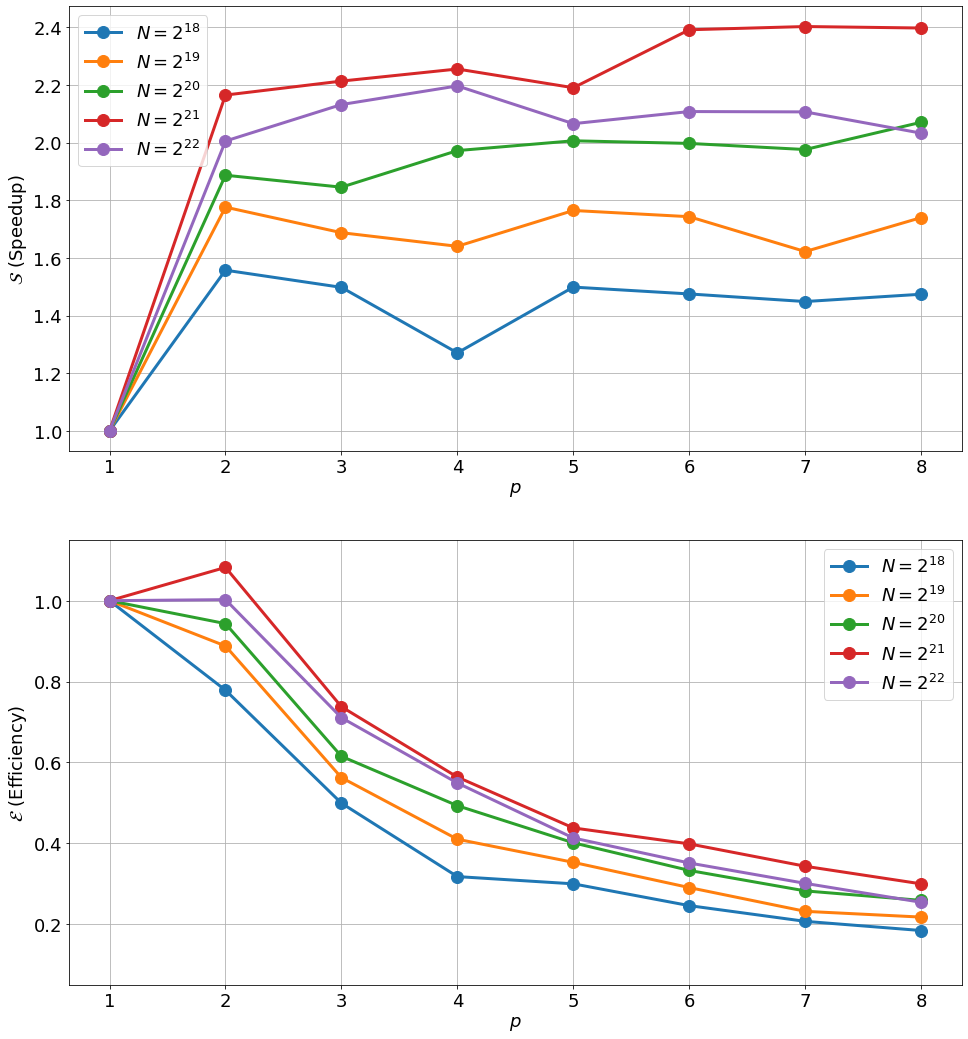

In [35]:
fig = plt.figure(figsize=(16,18))
N_set = np.arange(1, 501, 1)
n_set = np.array([18, 19, 20, 21, 22])
plt.subplot(2,1,1)
T01 = np.array([df[df["N"] == N].time.to_list()[0]]*8)
plt.rcParams.update({'font.size': 18})

for n in n_set:
    N = 2**n
    T01 = np.array([df[df["N"] == N].time.to_list()[0]]*8)
    plt.plot(df[df["N"] == N].p.to_list(), T01/df[df["N"] == N].time.to_list(), 'o-', lw = 3, ms = 12, label = '$N = 2^{%d}$' %n)
plt.legend()
plt.grid()
plt.ylabel('$\mathcal{S}$ (Speedup)')
plt.xlabel('$p$')

plt.subplot(2,1,2)
for n in n_set:
    N = 2**n
    T01 = np.array([df[df["N"] == N].time.to_list()[0]]*8)
    plt.plot(np.array(df[df["N"] == N].p.to_list()), T01/df[df["N"] == N].time.to_list()/np.array(df[df["N"] == N].p.to_list()),
             'o-', lw = 3, ms = 12, label = '$N = 2^{%d}$' %n)
plt.grid()
plt.ylim(0.05, 1.15)
plt.legend()
plt.ylabel('$\mathcal{E}$ (Efficiency)')
plt.xlabel('$p$')
#plt.savefig('plots.png', dpi = 300, bbox_inches = 'tight')

plt.savefig('plots.eps', dpi = 300, bbox_inches = 'tight')
plt.show()
